# Principle Component Analysis

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

In [2]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [3]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [4]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [5]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

0.1640 of the total variance (out of 1) in the training data is explained by the first 1 principal components
0.2973 of the total variance (out of 1) in the training data is explained by the first 2 principal components
0.3990 of the total variance (out of 1) in the training data is explained by the first 3 principal components
0.4696 of the total variance (out of 1) in the training data is explained by the first 4 principal components
0.5083 of the total variance (out of 1) in the training data is explained by the first 5 principal components
0.6522 of the total variance (out of 1) in the training data is explained by the first 10 principal components
0.8090 of the total variance (out of 1) in the training data is explained by the first 20 principal components
0.8985 of the total variance (out of 1) in the training data is explained by the first 30 principal components
0.9509 of the total variance (out of 1) in the training data is explained by the first 40 principal components
0.9821

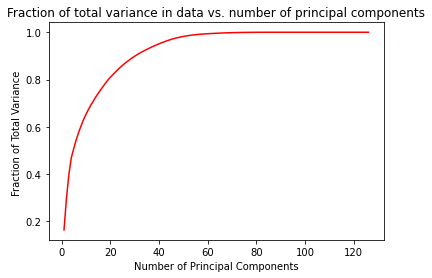

In [5]:
def P1():
    ## STUDENT START ###
    #generate PCA instance
    #do we need to set n_components arguement?
    pca = PCA()
    #apply PCA on the train data
    pca_train = pca.fit_transform(train_data)
    
    #use the explained_variance_ratio_ attribute of the PCA function to get the 
    #Percentage of variance explained by each of the selected components
    variances = pca.explained_variance_ratio_.cumsum()

    #loop through the k_vals listed in problem and print the total variance explained by that value
    k_vals = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    for k in k_vals:
        print("{:.4f} of the total variance (out of 1) in the training data is explained by the first {} principal components".format(variances[k-1], k))
    
    plot_vals = np.arange(1,127)
    
    #
    plt.plot(plot_vals, variances,color='red')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Fraction of Total Variance ')
    plt.title('Fraction of total variance in data vs. number of principal components')
    plt.show()
    ## STUDENT END ###

P1()

### PCA for visualization

PCA can be very useful for visualizing data. 
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

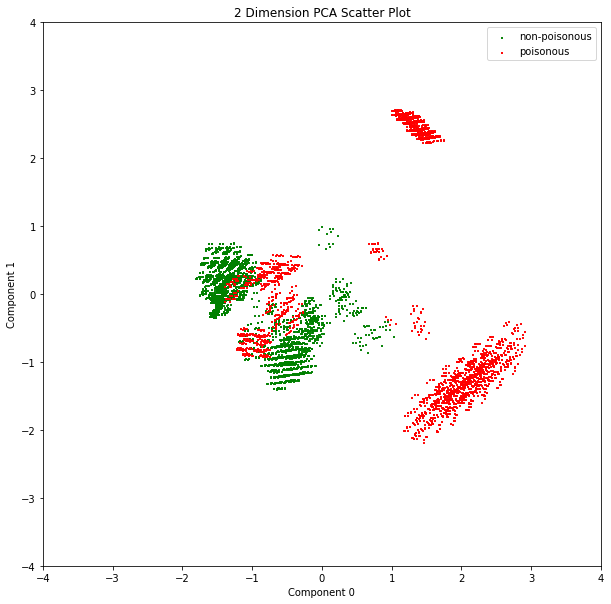

In [6]:
def Q2():   
  ### STUDENT START ###

    #Project training data down to 2 dimensions
    model = PCA(n_components=2)
    out = model.fit_transform(train_data)

    #Label = 1, poisonous mushroom, plot in red
    #Label = 0, non-poisonous mushroom, plot in green
    colors = ['green', 'red']
    labels = ['non-poisonous', 'poisonous']
    
    #Show scatter plot
    plt.figure(figsize = (10,10))
    plt.axis([-4,4,-4,4])
    for i in range(2):
        plt.scatter(
        out[:,0][train_labels == i],
        out[:,1][train_labels == i],
        s=1, c=colors[i],
        marker='s', edgecolor=colors[i],
        label=labels[i]
    )

    #add labels, title, and legend 
    plt.xlabel('Component 0')
    plt.ylabel('Component 1')
    plt.title("2 Dimension PCA Scatter Plot")
    plt.legend(labels) 
  ### STUDENT END ###

Q2()

### Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data. 
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

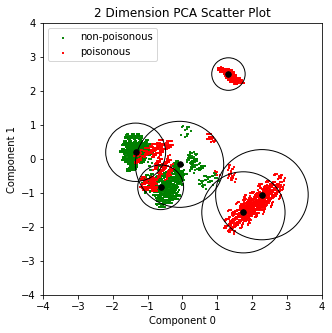

In [9]:
def Q3():   
  ### STUDENT START ###

    #get 2d projected data using PCA
    model = PCA(n_components=2)
    out = model.fit_transform(train_data)
    
    #recreate scatter plot from part 2
    colors = ['green', 'red']
    labels = ['non-poisonous', 'poisonous']
    
    #show scatter plot from Q2 of the two components
    plt.figure(figsize = (5,5))
    plt.axis([-4,4,-4,4])
    for i in range(2):
        plt.scatter(out[:,0][train_labels == i],out[:,1][train_labels == i],
                    s=1, c=colors[i],marker='s', edgecolor=colors[i],label=labels[i])
    #add labels and title
    plt.xlabel('Component 0')
    plt.ylabel('Component 1')
    plt.title("2 Dimension PCA Scatter Plot")
    plt.legend(labels) 
    
    #fit a 6 cluster k-means cluster model
    #km = KMeans(n_clusters = 6, init = 'random', n_init = 10, random_state = 0).fit(out)
    #only requirement given was to provide it with 6 clusters
    km = KMeans(n_clusters = 6).fit(out)
    #generate predictions that assign each point to a cluster numbered 0-5
    kmpred = km.predict(out)
    

    #get centroid coordinates using cluster_centers_
    centroids = km.cluster_centers_
    #plot cluster centroids
    plt.scatter(centroids[:,0], centroids[:,1], s=30, c='black')
    
    #set fig and ax to current plot
    fig = plt.gcf()
    ax = fig.gca()
    
    #loop through all six clusters
    for c in range(6):
        max_radii = 0
        #get the points for current cluster in loop and zip into tuple 
        cluster_points = zip(out[kmpred == c, 0], out[kmpred == c, 1])
        #calculate the distances from the centroid to the cluster point for each point
        distances = [np.linalg.norm(np.subtract(p, centroids[c])) for p in cluster_points]
        #take the max of these distances to set the radius for the circle for that cluster
        max_radii = max(distances)
        #plot the circles using add_patch
        ax.add_patch(plt.Circle(centroids[c], radius=max_radii, fill=False))
         
  ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. 
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours. 
    - Each row showing a different number of mixture components. 
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

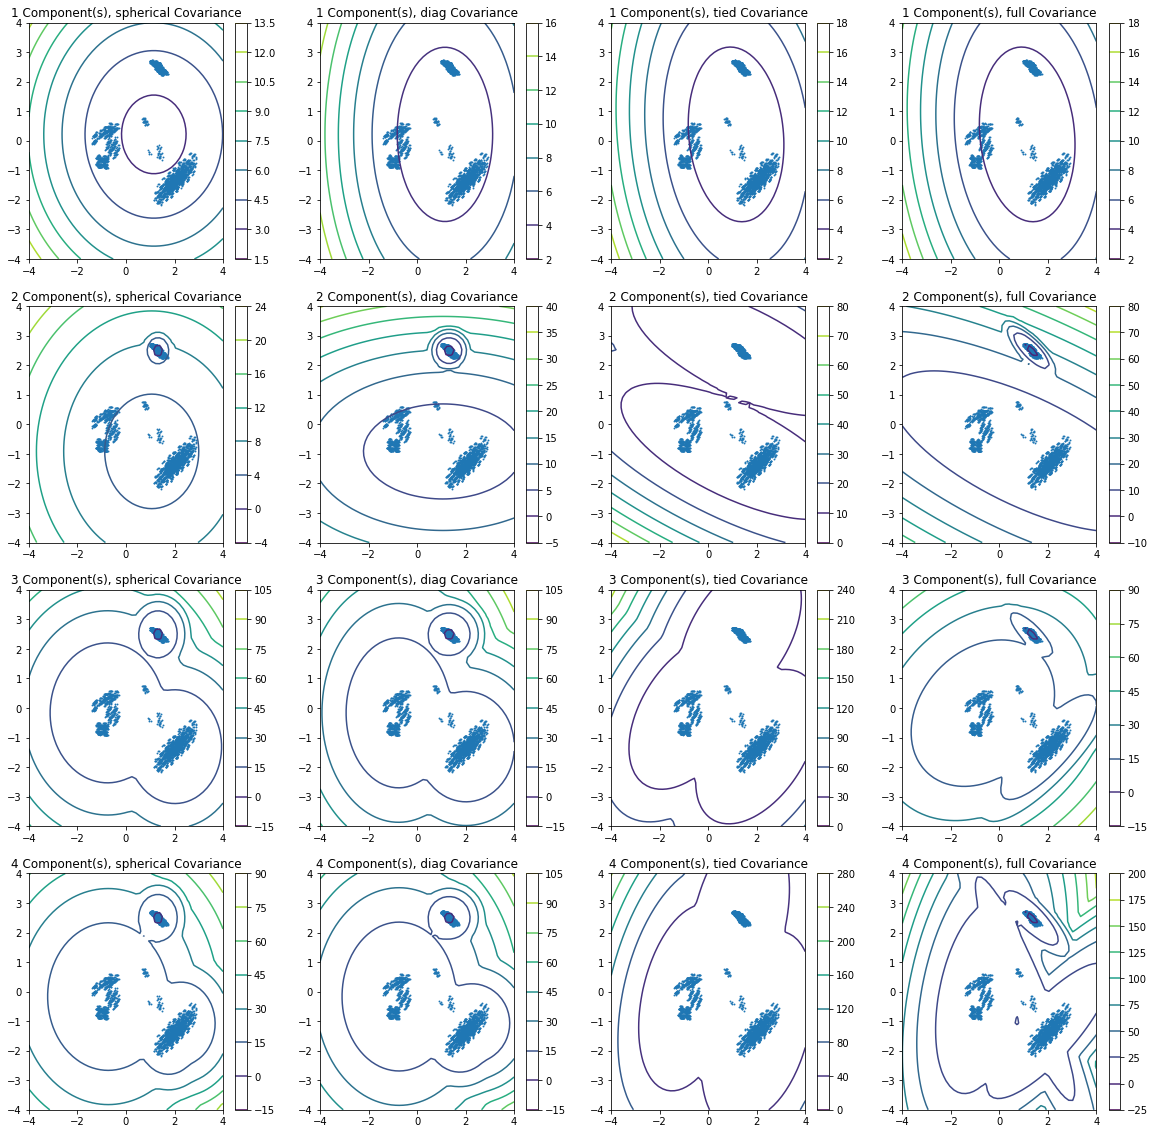

In [11]:
def Q4():
    ### STUDENT START ###
    #get 2d projected data using PCA and select only the postivie examples
    model = PCA(n_components = 2)
    out = model.fit_transform(train_data)
    positives = out[train_labels == 1]
    
    #covar types to loop through
    covars = ['spherical', 'diag', 'tied', 'full']
    
    #create figure and set dimensions
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    #loop through component x covar type combinations to create 4x4 grid of plots
    count = 1
    for comp in range(4):
        for cov in range(0,len(covars)):
            #create gaussian mixture model with designated parameters
            gmm = GaussianMixture(n_components=comp+1, covariance_type=covars[cov], 
                                  random_state=12345).fit(positives)
            #create subplot on iteration
            ax = fig.add_subplot(4, 4, count)
            
            #use code from example provided in notes to get density contours
            x = np.linspace(-4.0, 4.0)
            y = np.linspace(-4.0, 4.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            #scatter plot positive examples by component 
            ax.scatter(positives[:, 0], positives[:, 1], .8)
            #add contour plot
            CS = ax.contour(X, Y, Z)
            fig.colorbar(CS, ax=ax)
            
            #label subplot
            ax.set_title("{} Component(s), {} Covariance".format(comp+1, covars[cov]))
            
            count += 1         
    ### STUDENT END ###

Q4()

Answer: For tied covariance, the components share the same shape, but that shape could look like anything. In full covariance, the components can independently have their own shapes and positions. This is clear from the plots. Especially for the column with tied covariance. You can see that the representation of a component is the same from the others. 

### Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data. 
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

In [5]:
def Q5():  
  ### STUDENT START ###

    #regenerate 2d projected data for test and train data
    model = PCA(n_components = 2)
    train_out = model.fit_transform(train_data)
    test_out = model.transform(test_data)
    
    #get poisonous and non-poisonous examples
    pois = train_out[train_labels == 1]
    non_pois = train_out[train_labels == 0]
    
    #fit GMMs using parameter requirements (1 for poisonous examples, 1 for non-poisonous)
    pois_gmm = GaussianMixture(n_components=4, covariance_type='full', 
                                  random_state=12345).fit(pois)
    non_pois_gmm = GaussianMixture(n_components=4, covariance_type='full', 
                                  random_state=12345).fit(non_pois)
    
    #use score_samples to measure how likely it is each example
    #in the test data was "generated" by gmm_poison and gmm_nonpoison
    pois_scores = np.exp(pois_gmm.score_samples(test_out))
    nonpois_scores = np.exp(non_pois_gmm.score_samples(test_out))
    
    #create list of predictions using the more likely score to choose the label
    #this will return a list of booleans to then be transformed into 1 and 0 values
    preds = pois_scores > nonpois_scores
    preds = np.multiply(preds, 1)
    
    #count the correct number of prediction labels compared to the test set labels
    correct_count = 0
    for i in range(len(preds)):
        if preds[i] == test_labels[i]:
            correct_count += 1
    #calculate and print the model accuracy        
    accuracy = correct_count / len(test_labels)
    print("The accuracy of the predictions on the test data is {:.4f}".format(accuracy))
    
  ### STUDENT END ###

Q5()

The accuracy of the predictions on the test data is 0.9502


### Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.


Best result: PCA = 4, GMM = (3,tied), Parameters = 48, Accuracy = 0.969751


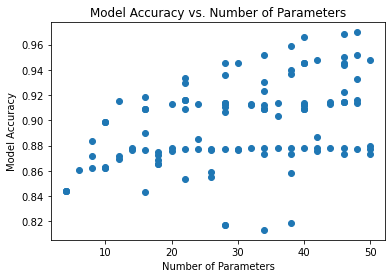

In [12]:
from matplotlib.lines import Line2D

def Q6():
  ### STUDENT START ###
    best_combination = ()
    best_accuracy = 0
    
    param_counts = []
    accuracies = []

    for n_pca in range(1, 50):

        model = PCA(n_components = n_pca)
        train_results = model.fit_transform(train_data)
        test_results = model.transform(test_data)

        train_positives = train_results[train_labels == 1]
        train_negatives = train_results[train_labels == 0]

        for n_gmm in range(1,50):

            for covar_type in ['spherical', 'diag', 'tied', 'full']:
                parameters_count = 0

                # spherical ((n_gmm - 1) + (n_pca * n_gmm) + n_gmm) * n_classes
                if covar_type == 'spherical':
                    parameters_count = ((n_gmm - 1) + (n_pca * n_gmm) + n_gmm) * 2
                # diagnoal ((n_gmm - 1) + n_pca*n_gmm + n_pca * n_gmm) * n_classes
                elif covar_type == 'diag':
                    parameters_count = ((n_gmm - 1) + (n_pca * n_gmm) + (n_pca * n_gmm)) * 2
                #tied ((n_gmm - 1) +n_pca*n_gmm + n_pca * (n_pca + 1)/ 2) * n_classes
                elif covar_type == 'tied':
                    parameters_count = ((n_gmm - 1) + (n_pca*n_gmm) + n_pca * (n_pca + 1)/ 2) * 2
                # full - ((n_gmm - 1) +n_pca*n_gmm + n_pca * (n_pca + 1)/ 2 * n_gmm) * n_classes
                elif covar_type == 'full':
                    parameters_count = ((n_gmm - 1) +n_pca*n_gmm + n_pca * (n_pca + 1)/ 2 * n_gmm) * 2

                if parameters_count > 50:
                    continue

                gmm_positives = GaussianMixture(n_components=n_gmm, covariance_type=covar_type, random_state=12345).fit(train_positives)
                gmm_negatives = GaussianMixture(n_components=n_gmm, covariance_type=covar_type, random_state=12345).fit(train_negatives)

                correct_predictions = 0

                for i in range(len(test_labels)):
                    if ((gmm_positives.score([test_results[i]]) > gmm_negatives.score([test_results[i]])) and test_labels[i] == 1):
                        correct_predictions = correct_predictions + 1

                    if ((gmm_positives.score([test_results[i]]) < gmm_negatives.score([test_results[i]])) and test_labels[i] == 0):
                        correct_predictions = correct_predictions + 1
                
                accuracy = correct_predictions / len(test_labels)
                if best_accuracy < correct_predictions / len(test_labels):
                    best_combination = (n_pca, n_gmm, covar_type, parameters_count, accuracy)
                    best_accuracy = correct_predictions / len(test_labels)
                
                param_counts.append(parameters_count)
                accuracies.append(accuracy)

                #print ("Processed: PCA = %d, GMM = (%d,%s), Parameters = %d, Accuracy = %f" % (pca_component, gmm_component, covar_type, parameters_count, correct_predictions / len(test_labels)))
    
    print ("\nBest result: PCA = %d, GMM = (%d,%s), Parameters = %d, Accuracy = %f" % best_combination)
    
    plt.scatter(param_counts, accuracies)
    plt.xlabel('Number of Parameters')
    plt.ylabel('Model Accuracy')
    plt.title('Model Accuracy vs. Number of Parameters')
    plt.show()


  ### STUDENT END ###

Q6()